In [126]:
# For these lessons we will need NumPy, pandas, matplotlib and seaborn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# and of course the actual regression (machine learning) module
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


In [127]:
df=pd.read_csv('GoldUP.csv')
df

,Date,Gold_Price,Crude_Oil,Interest_Rate,USD_INR,Sensex,CPI,USD_Index
0,01-10-2000,4538,1455.51,8.00,46.318297,3711.02,37.23,116.65
1,01-11-2000,4483,1512.47,8.00,46.783613,3997.99,37.31,115.24
2,01-12-2000,4541,1178.11,8.00,46.745856,3972.12,36.98,109.56
3,01-01-2001,4466,1208.18,8.00,46.536033,4326.72,36.90,110.52
4,01-02-2001,4370,1267.18,7.50,46.514595,4247.04,36.73,112.01
...,...,...,...,...,...,...,...,...
234,01-04-2020,45504,1603.02,4.65,76.222334,33717.62,125.85,99.57
235,01-05-2020,46343,2298.55,4.25,75.666063,32424.10,126.24,98.34
236,01-06-2020,47315,2987.46,4.25,75.763427,34915.80,127.00,97.39
237,01-07-2020,49878,3156.01,4.25,74.908993,37606.89,128.53,93.35


In [128]:
df= df.iloc[:,:2]
df.columns=['Date','price_this_mounth']
df

,Date,price_this_mounth
0,01-10-2000,4538
1,01-11-2000,4483
2,01-12-2000,4541
3,01-01-2001,4466
4,01-02-2001,4370
...,...,...
234,01-04-2020,45504
235,01-05-2020,46343
236,01-06-2020,47315
237,01-07-2020,49878


In [129]:
new_column =[]
for i in range(0,len(df['price_this_mounth'])-1):
    new_column.append(df['price_this_mounth'][i+1])

df.drop(index=len(df['price_this_mounth'])-1 ,inplace=True)
print(df.shape[0])
print(len(new_column))
df['price_next_mounth']=new_column
df

238
238


,Date,price_this_mounth,price_next_mounth
0,01-10-2000,4538,4483
1,01-11-2000,4483,4541
2,01-12-2000,4541,4466
3,01-01-2001,4466,4370
4,01-02-2001,4370,4269
...,...,...,...
233,01-03-2020,42285,45504
234,01-04-2020,45504,46343
235,01-05-2020,46343,47315
236,01-06-2020,47315,49878


In [130]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 238 entries, 0 to 237
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Date               238 non-null    object
 1   price_this_mounth  238 non-null    int64 
 2   price_next_mounth  238 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 5.7+ KB


In [131]:
train,test= train_test_split(df,test_size = 0.30,random_state=0)
x=train['price_this_mounth']
x=x.values.reshape(-1,1)
y=train['price_next_mounth']


In [132]:
reg = LinearRegression()
reg.fit(x,y)
print(f'price next mounth = {reg.coef_[0]}* pric this mounth + {reg.intercept_} with R-squared = {reg.score(x,y)} ')

price next mounth = 1.0135915025899351* pric this mounth + -50.784998481336515 with R-squared = 0.9961655754406338 


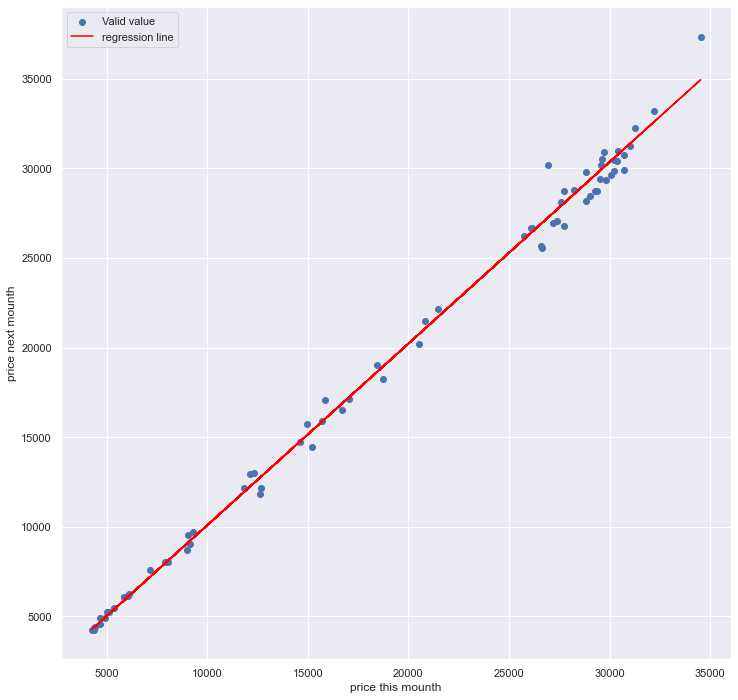

In [133]:
y_predict=reg.predict(test['price_this_mounth'].values.reshape(-1,1))
plt.figure(figsize=(12,12))
plt.scatter(test['price_this_mounth'],test['price_next_mounth'],label='Valid value')
plt.plot(test['price_this_mounth'],y_predict,color='red' ,label='regression line')
plt.xlabel('price this mounth')
plt.ylabel('price next mounth')
plt.legend()
plt
plt.show()

In [134]:
new_df=test.iloc[:,1:]
new_df.columns=['price this mounth','vaild price next mounth' ]
new_df['predict price next mounth']=y_predict.astype('int64')
new_df.info()
new_df['difference']=new_df['vaild price next mounth']-new_df['predict price next mounth']
new_df

<class 'pandas.core.frame.DataFrame'>
Int64Index: 72 entries, 178 to 52
Data columns (total 3 columns):
 #   Column                     Non-Null Count  Dtype
---  ------                     --------------  -----
 0   price this mounth          72 non-null     int64
 1   vaild price next mounth    72 non-null     int64
 2   predict price next mounth  72 non-null     int64
dtypes: int64(3)
memory usage: 2.2 KB


,price this mounth,vaild price next mounth,predict price next mounth,difference
178,25729,26246,26027,219
153,26928,30216,27243,2973
106,14952,15723,15104,619
111,16706,16525,16882,-357
125,20835,21470,21067,403
...,...,...,...,...
4,4370,4269,4378,-109
104,14639,14720,14787,-67
61,7168,7586,7214,372
160,30211,29832,30570,-738
